In [1]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import torch
import copy

In [2]:
sys.path.append('../../WatChMaL/')

In [3]:
from watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset_Copy1 import CNNmPMTDataset

In [4]:
def plot_event(data, mpmt_pos, old_convention=False, title=None, style="default", cmap=plt.cm.jet, vertical_partition=False,
              padded=False, horizontal_partition=False):
    cmap = copy.copy(cmap)
    if style=="dark_background":
        edgecolor='0.15'
        cmap.set_bad(color='black')
    else:
        edgecolor='0.85'
        cmap.set_bad(color='white')
    data[data==0] = np.nan
    indices = np.indices(data.shape)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    mpmts = [Circle((pos[1], pos[0]), radius=0.47)
             for pos in mpmt_pos]
    with plt.style.context(style):
        if old_convention:
            figsize = (20,16)
        elif padded:
            figsize = (25,10)
        else:
            figsize = (20,12)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        ax.add_collection(PatchCollection(mpmts, facecolor='none', linewidths=1, edgecolors=edgecolor))
        pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), s=3, cmap=cmap)
        plt.colorbar(pmts)
    if title is not None:
        ax.set_title(title)
    
    #New
    if vertical_partition:
        plt.axvline(x=data.shape[2]-1, c='r')
    
    if horizontal_partition:
        plt.axhline(y=data.shape[1]-1, c='r')

In [5]:
def channel_to_position(channel):
    channel = channel % 19 
    theta = (channel<12)*2*np.pi*channel/12 + ((channel >= 12) & (channel<18))*2*np.pi*(channel-12)/6
    radius = 0.2*(channel<18)+0.2*(channel<12)
    position = [radius*np.cos(theta), radius*np.sin(theta)] # note this is [y, x] or [row, column]
    return position

<h2>Original</h2>

In [12]:
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"
data_obj = CNNmPMTDataset(data_path, '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', is_distributed=False)

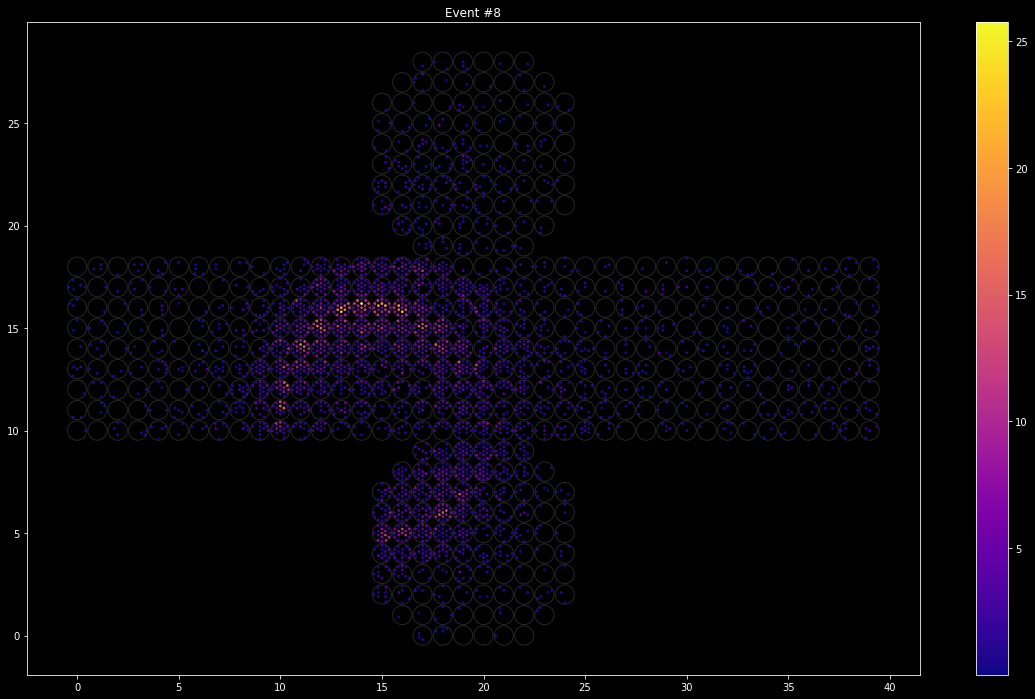

In [13]:
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma)

In [9]:
data_obj.transforms

[<bound method CNNmPMTDataset.horizontal_flip of <watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset_Copy1.CNNmPMTDataset object at 0x7fc3703796a0>>]

<h2>Horizontal Flip</h2>

In [14]:
data_obj = CNNmPMTDataset(data_path, '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', is_distributed=False,
                          transforms=['horizontal_flip'])

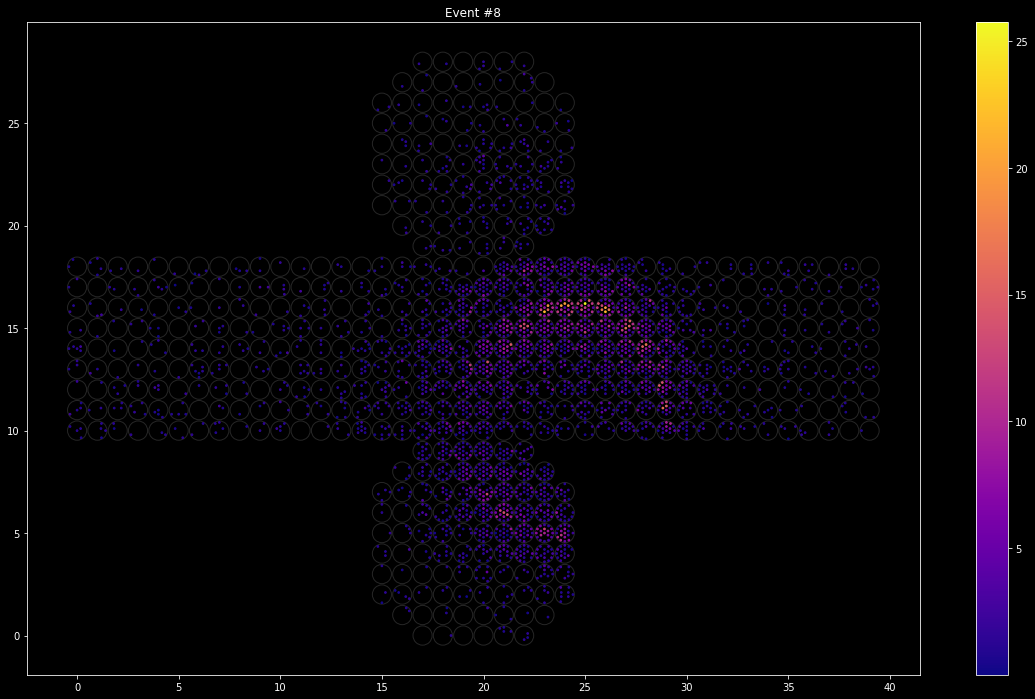

In [16]:
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=False)

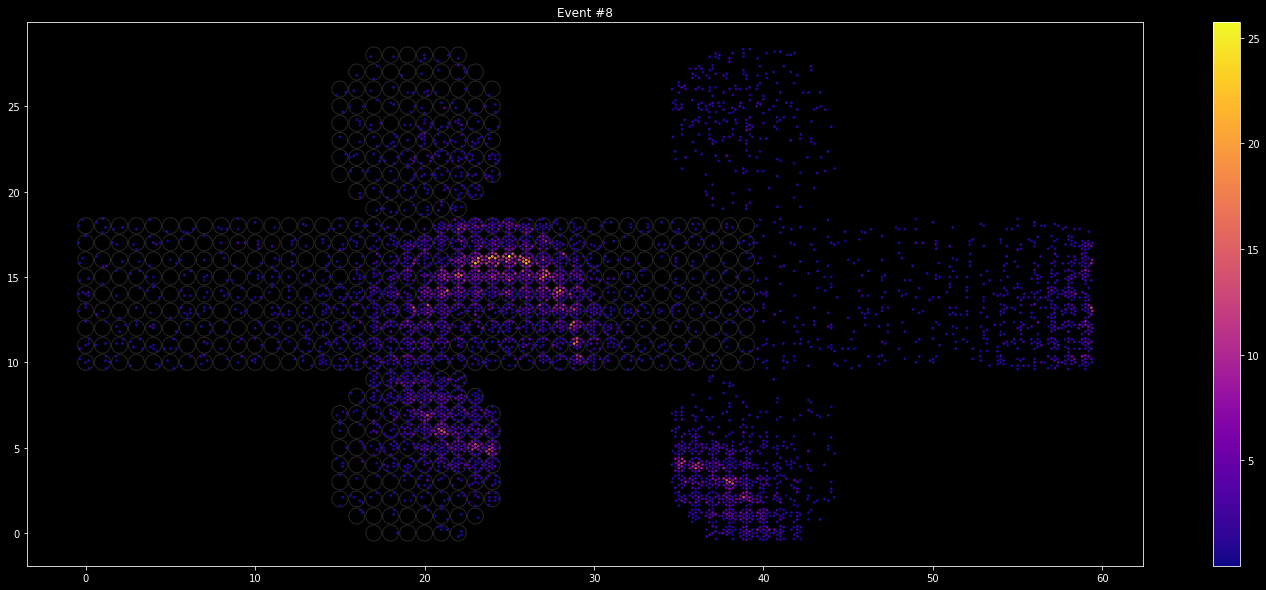

In [17]:
data_obj.pad = True
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=True)

<h2>Vertical Flip</h2>

In [18]:
data_obj = CNNmPMTDataset(data_path, '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', is_distributed=False,
                          transforms=['vertical_flip'])

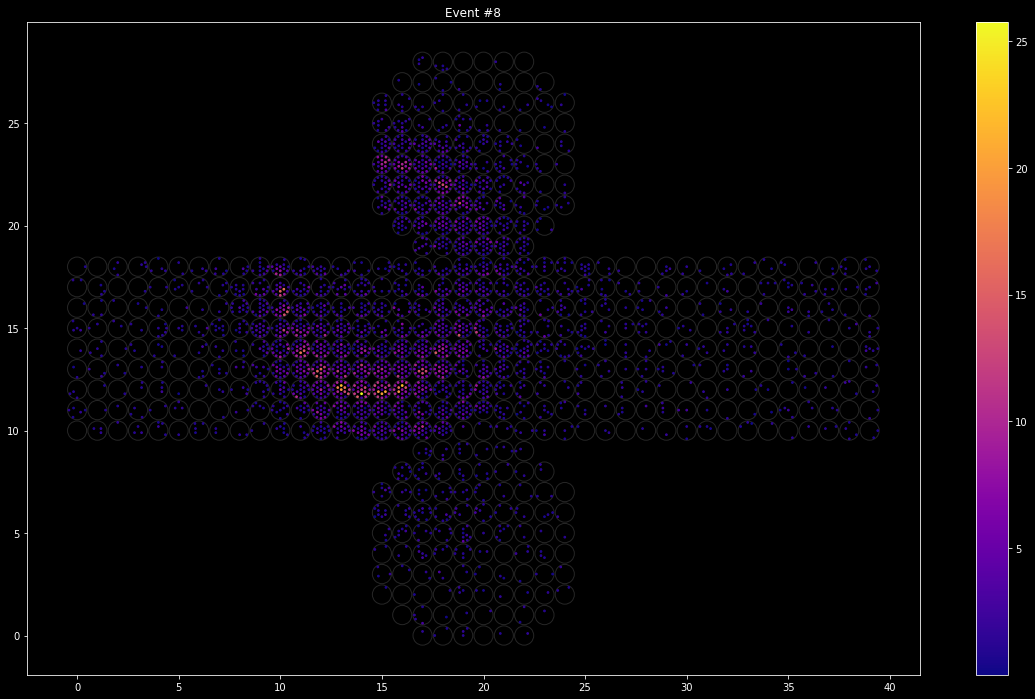

In [21]:
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=False)

In [22]:
data_obj.transforms

[<bound method CNNmPMTDataset.vertical_flip of <watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset_Copy1.CNNmPMTDataset object at 0x7fc3628ee580>>]

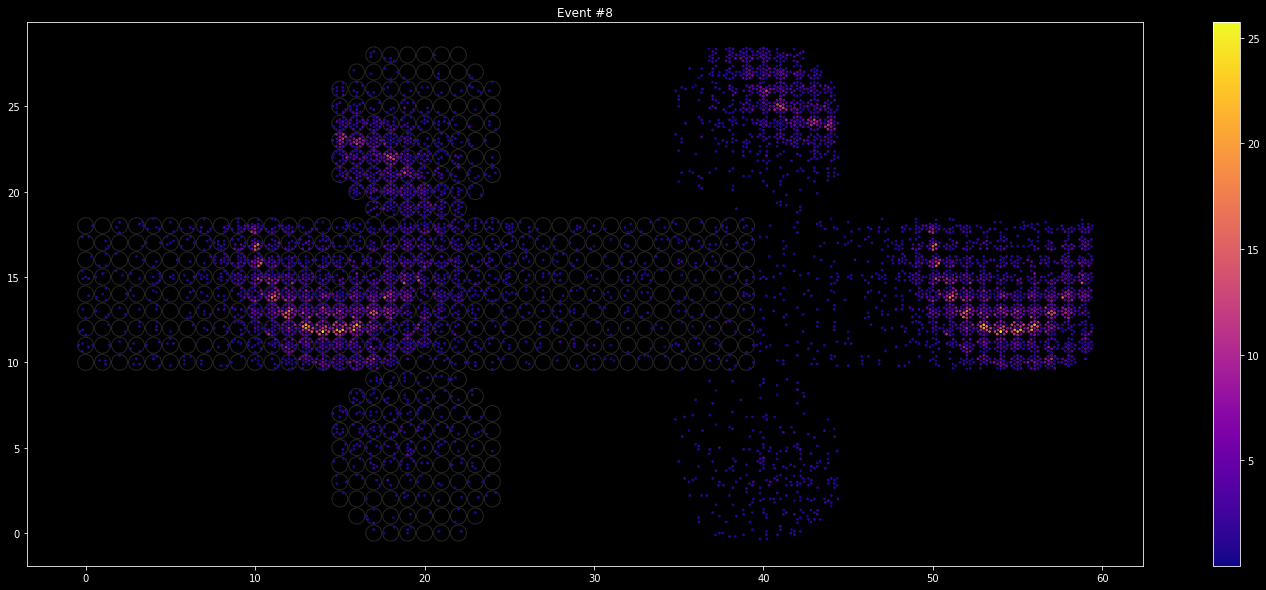

In [25]:
data_obj.pad = True
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=True)

<h2>180 Degree Rotation</h2>

In [26]:
data_obj = CNNmPMTDataset(data_path, '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', is_distributed=False,
                          transforms=['rotation180'])

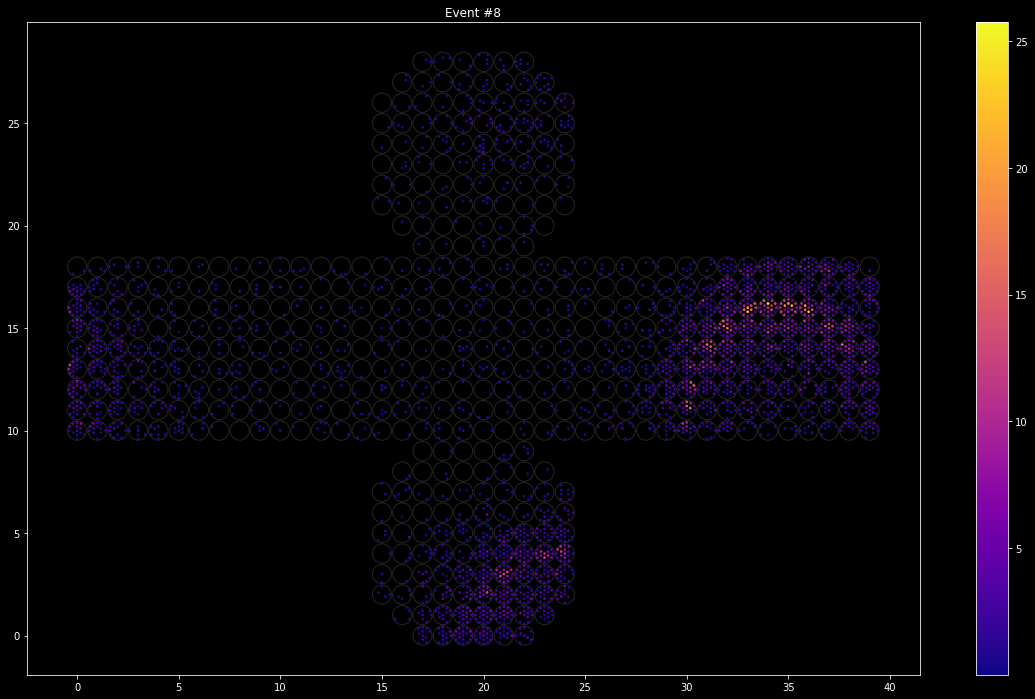

In [27]:
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=False)

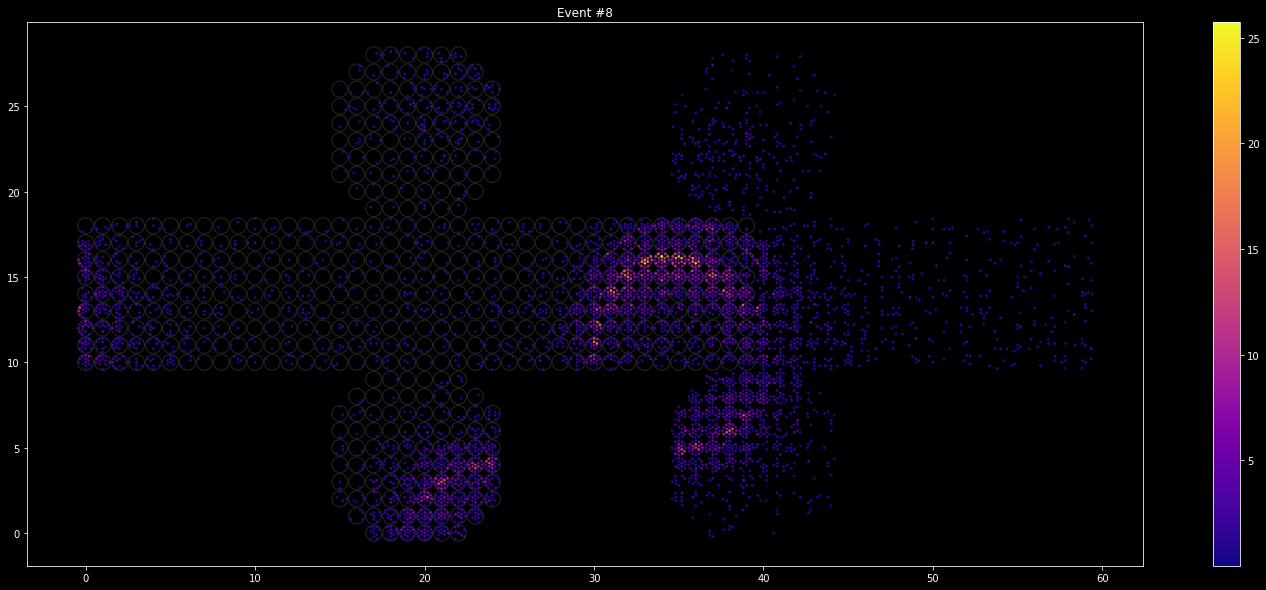

In [30]:
data_obj.pad = True
data_short_test = data_obj.__getitem__(135423)['data']
plot_event(data_short_test, data_obj.mpmt_positions, title="Event #8", style="dark_background", cmap=plt.cm.plasma,
          padded=True)